In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

import sklearn 

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Libraries related to outlier detection
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})

pd.options.display.float_format = '{:.2f}'.format

### Importing the dataset

In [2]:
df = pd.read_csv("cars_10_16_23.csv", usecols = range(1, 42))
df.head()

,Represented Test Veh Make,Aftertreatment Device Desc,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Represented Test Veh Model,Drive System Description,Test Veh Displacement (L),Shift Indicator Light Use Desc,N/V Ratio,Rated Horsepower,...,Test Vehicle ID,NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),Tested Transmission Type Code,PM (g/mi),Vehicle Type,Set Coef B (lbf/mph),N2O (g/mi),Target Coef C (lbf/mph**2)
0,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.00,Not eqipped,22.20,503,...,562TT5348,0.03,22.70,386.66,SA,NaN,Car,0.09,0.01,0.03
1,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.00,Not eqipped,22.20,503,...,562TT5348,0.00,33.80,259.74,SA,NaN,Car,0.09,NaN,0.03
2,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.20,Not eqipped,23.00,715,...,7002PT7056,0.03,17.70,499.69,SA,NaN,Car,0.08,0.00,0.03
3,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.20,Not eqipped,23.00,715,...,7002PT7056,0.01,30.60,290.25,SA,NaN,Car,0.08,NaN,0.03
4,Aston Martin,Three-way catalyst,Top gear ratio < 1,5500,DBX,4-Wheel Drive,4.00,Not eqipped,21.00,550,...,8001PT8342,0.01,17.20,521.26,A,NaN,Both,-0.53,NaN,0.04


##### Descriptive statistics

In [3]:
df.describe()

,Equivalent Test Weight (lbs.),Test Veh Displacement (L),N/V Ratio,Rated Horsepower,Test Veh Configuration #,# of Cylinders and Rotors,Target Coef B (lbf/mph),Target Coef A (lbf),CO (g/mi),THC (g/mi),...,Axle Ratio,# of Gears,Set Coef A (lbf),NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),PM (g/mi),Set Coef B (lbf/mph),N2O (g/mi),Target Coef C (lbf/mph**2)
count,11304.00,11304.00,11304.00,11304.00,11304.00,10027.00,11304.00,11304.00,10088.00,10071.00,...,11304.00,11304.00,11304.00,10031.00,11212.00,10501.00,1365.00,11304.00,4050.00,11304.00
mean,4363.66,3.27,32.13,284.26,1.49,5.55,0.27,38.56,0.36,0.02,...,3.60,6.02,12.05,0.01,41.83,319.01,0.00,0.10,0.01,0.02
std,849.24,4.84,20.95,129.94,2.87,1.77,0.33,11.19,3.25,0.05,...,1.02,2.39,10.45,0.01,286.21,114.00,0.03,0.26,0.04,0.01
min,2125.00,0.00,0.00,1.00,0.00,2.00,-0.81,1.84,0.00,0.00,...,0.00,1.00,-52.80,0.00,0.00,105.16,0.00,-1.98,0.00,0.00
25%,3750.00,2.00,25.30,184.00,0.00,4.00,0.10,30.57,0.07,0.00,...,3.15,5.00,6.27,0.00,22.90,233.53,0.00,-0.04,0.00,0.02
50%,4250.00,3.00,28.40,265.00,1.00,6.00,0.27,37.52,0.19,0.01,...,3.44,6.00,12.51,0.01,29.40,301.00,0.00,0.10,0.00,0.02
75%,5000.00,3.70,33.10,335.50,2.00,6.00,0.46,44.97,0.41,0.03,...,3.85,8.00,18.53,0.02,38.80,385.00,0.00,0.24,0.01,0.03
max,7000.00,100.00,999.00,1500.00,50.00,16.00,1.73,150.00,323.00,1.21,...,9.99,10.00,96.00,0.21,10000.00,1012.00,1.02,2.20,1.98,0.22


##### Remove the vehicles with mpg > 120

In [4]:
df = df[df["RND_ADJ_FE"] < 120]
df.describe()

,Equivalent Test Weight (lbs.),Test Veh Displacement (L),N/V Ratio,Rated Horsepower,Test Veh Configuration #,# of Cylinders and Rotors,Target Coef B (lbf/mph),Target Coef A (lbf),CO (g/mi),THC (g/mi),...,Axle Ratio,# of Gears,Set Coef A (lbf),NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),PM (g/mi),Set Coef B (lbf/mph),N2O (g/mi),Target Coef C (lbf/mph**2)
count,11053.00,11053.00,11053.00,11053.00,11053.00,9944.00,11053.00,11053.00,10065.00,10062.00,...,11053.00,11053.00,11053.00,10003.00,11053.00,10490.00,1360.00,11053.00,4044.00,11053.00
mean,4355.92,3.13,31.00,284.07,1.51,5.56,0.27,38.60,0.36,0.02,...,3.57,6.10,12.21,0.01,31.82,319.00,0.00,0.10,0.01,0.02
std,849.50,2.27,15.99,128.64,2.89,1.77,0.34,11.20,3.25,0.05,...,0.87,2.33,10.40,0.01,13.40,113.97,0.03,0.26,0.04,0.01
min,2125.00,0.00,0.00,1.00,0.00,2.00,-0.81,1.84,0.00,0.00,...,1.00,1.00,-52.80,0.00,0.00,105.16,0.00,-1.98,0.00,0.00
25%,3750.00,2.00,25.30,184.00,0.00,4.00,0.10,30.64,0.08,0.00,...,3.15,6.00,6.50,0.00,22.80,233.65,0.00,-0.04,0.00,0.02
50%,4250.00,3.00,28.30,265.00,1.00,6.00,0.27,37.54,0.19,0.01,...,3.44,6.00,12.67,0.01,29.20,301.00,0.00,0.10,0.00,0.02
75%,5000.00,3.70,32.90,335.00,2.00,6.00,0.46,44.99,0.42,0.03,...,3.82,8.00,18.60,0.02,38.30,385.05,0.00,0.24,0.01,0.03
max,7000.00,100.00,999.00,1500.00,50.00,16.00,1.73,150.00,323.00,1.21,...,9.99,10.00,96.00,0.21,119.50,1012.00,1.02,2.20,1.98,0.22


### Impute missing values

In [5]:
missing_vals_cols = df.isna().sum()

# List of all features having missing values
missing_vals_cols[missing_vals_cols != 0]

Aftertreatment Device Desc    1222
# of Cylinders and Rotors     1109
CO (g/mi)                      988
Aftertreatment Device Cd      1222
THC (g/mi)                     991
CH4 (g/mi)                    3695
NOx (g/mi)                    1050
CO2 (g/mi)                     563
PM (g/mi)                     9693
N2O (g/mi)                    7009
dtype: int64

Few of the columns have a lot of missing values. Imputing such a high number of missing values may lead to skewing of data points. So we will drop the columns missing a lot of values and impute value for some columns which do not have many missing values

In [6]:
cols_drop = ["PM (g/mi)", "N2O (g/mi)"]
df = df.drop(cols_drop, axis=1)

df.head()

,Represented Test Veh Make,Aftertreatment Device Desc,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Represented Test Veh Model,Drive System Description,Test Veh Displacement (L),Shift Indicator Light Use Desc,N/V Ratio,Rated Horsepower,...,# of Gears,Set Coef A (lbf),Test Vehicle ID,NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),Tested Transmission Type Code,Vehicle Type,Set Coef B (lbf/mph),Target Coef C (lbf/mph**2)
0,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.00,Not eqipped,22.20,503,...,8,11.26,562TT5348,0.03,22.70,386.66,SA,Car,0.09,0.03
1,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.00,Not eqipped,22.20,503,...,8,11.26,562TT5348,0.00,33.80,259.74,SA,Car,0.09,0.03
2,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.20,Not eqipped,23.00,715,...,8,6.81,7002PT7056,0.03,17.70,499.69,SA,Car,0.08,0.03
3,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.20,Not eqipped,23.00,715,...,8,6.81,7002PT7056,0.01,30.60,290.25,SA,Car,0.08,0.03
4,Aston Martin,Three-way catalyst,Top gear ratio < 1,5500,DBX,4-Wheel Drive,4.00,Not eqipped,21.00,550,...,9,-4.88,8001PT8342,0.01,17.20,521.26,A,Both,-0.53,0.04


### Imputing missing values

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
freq_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Impute an empty value by replacing it with mean 
def impute_by_mean(col_name):
    df[col_name] = mean_imputer.fit_transform(df[col_name].values.reshape(-1, 1))

# Impute an empty value by replacing it with the most-frequent value
def impute_by_frequent(col_name):
    df[col_name] = freq_imputer.fit_transform(df[col_name].values.reshape(-1, 1))

In [9]:
cols_mean_impute = ["# of Cylinders and Rotors", "CO (g/mi)",
     "THC (g/mi)", "CH4 (g/mi)", "NOx (g/mi)", "CO2 (g/mi)"]

cols_freq_impute = ["Aftertreatment Device Desc", "Aftertreatment Device Cd"]

for col in cols_mean_impute:
    impute_by_mean(col)

for col in cols_freq_impute:
    impute_by_frequent(col)

### Outlier detection

In [10]:
df.describe()

,Equivalent Test Weight (lbs.),Test Veh Displacement (L),N/V Ratio,Rated Horsepower,Test Veh Configuration #,# of Cylinders and Rotors,Target Coef B (lbf/mph),Target Coef A (lbf),CO (g/mi),THC (g/mi),...,Model Year,Set Coef C (lbf/mph**2),Axle Ratio,# of Gears,Set Coef A (lbf),NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),Set Coef B (lbf/mph),Target Coef C (lbf/mph**2)
count,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,...,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00,11053.00
mean,4355.92,3.13,31.00,284.07,1.51,5.56,0.27,38.60,0.36,0.02,...,2016.23,0.02,3.57,6.10,12.21,0.01,31.82,319.00,0.10,0.02
std,849.50,2.27,15.99,128.64,2.89,1.68,0.34,11.20,3.10,0.05,...,4.97,0.01,0.87,2.33,10.40,0.01,13.40,111.03,0.26,0.01
min,2125.00,0.00,0.00,1.00,0.00,2.00,-0.81,1.84,0.00,0.00,...,2010.00,-0.09,1.00,1.00,-52.80,0.00,0.00,105.16,-1.98,0.00
25%,3750.00,2.00,25.30,184.00,0.00,4.00,0.10,30.64,0.08,0.00,...,2010.00,0.02,3.15,6.00,6.50,0.00,22.80,237.30,-0.04,0.02
50%,4250.00,3.00,28.30,265.00,1.00,5.56,0.27,37.54,0.22,0.01,...,2016.00,0.02,3.44,6.00,12.67,0.01,29.20,308.72,0.10,0.02
75%,5000.00,3.70,32.90,335.00,2.00,6.00,0.46,44.99,0.38,0.02,...,2023.00,0.03,3.82,8.00,18.60,0.01,38.30,379.41,0.24,0.03
max,7000.00,100.00,999.00,1500.00,50.00,16.00,1.73,150.00,323.00,1.21,...,2023.00,0.30,9.99,10.00,96.00,0.21,119.50,1012.00,2.20,0.22


Some of the columns having outliers are:
1. N/V ratio - mean is around 32, but max is 999
2. Rated Horsepower - mean is 284, but max is 1500
3. CO - definitely has outliers, mean is 0.36 but max is 323
4. CO2 - mean is 319 but max is 1012
5. Test Veh Displacement - mean is 3.13 but max is 100

In [11]:
# features considered for outlier analysis
outlier_cols = ["N/V Ratio", "Rated Horsepower", "CO (g/mi)", "CO2 (g/mi)",
     "Test Veh Displacement (L)"]

lof_df = df[outlier_cols]

In [12]:
# Setting contamination to identify 2% of the data as outliers
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02)

# predict the labels for each data point
y_pred_lof = lof.fit_predict(lof_df)
y_pred_lof

array([ 1,  1,  1, ..., -1, -1, -1])

In [13]:
# Identify outlier indices
outlier_indices = [i for i, pred in enumerate(y_pred_lof) if pred == -1]
outlier_indices[:10]

[13, 163, 348, 350, 403, 516, 519, 522, 525, 528]

In [14]:
# some of the indices may not be valid for the main dataset
valid_ind = []
for ind in outlier_indices:
    if ind in df.index:
        valid_ind.append(ind)

#### Remove outliers from the dataset

In [15]:
# Remove outliers from data
df = df.drop(valid_ind, axis=0)

### Determining response and feature space

#### Creating binary categorical response for CO and CO2

In [16]:
# CO < 1 is classified as 'Other' and >= 1 as 'High'

CO_bins = [0, 1, float('inf')]
CO_labels = ["Other", "High"]
df["CO"] = pd.cut(df["CO (g/mi)"], bins=CO_bins, labels=CO_labels)

df["CO"].head()

0    Other
1    Other
2    Other
3    Other
4    Other
Name: CO, dtype: category
Categories (2, object): ['Other' < 'High']

In [17]:
# CO < 1 is classified as 'Other' and >= 1 as 'High'

CO2_bins = [0, 600, float('inf')]
CO2_labels = ["Other", "High"]
df["CO2"] = pd.cut(df["CO2 (g/mi)"], bins=CO2_bins, labels=CO2_labels)

df["CO2"].head()

0    Other
1    Other
2    Other
3    Other
4    Other
Name: CO2, dtype: category
Categories (2, object): ['Other' < 'High']

### Determine associated features

In [18]:
from scipy.stats import ttest_ind

#### Identifying response columns

In [19]:
resp_col_CO = "CO"
resp_col_CO2 = "CO2"

num_cols = df._get_numeric_data().columns.drop(["CO (g/mi)", "CO2 (g/mi)"])

# categorical columns
cat_cols = list(set(df.columns.drop(["CO", "CO2", "CO (g/mi)", "CO2 (g/mi)"])) - set(num_cols))
cat_cols


['Test Fuel Type Description',
 'Police - Emergency Vehicle?',
 'Aftertreatment Device Cd',
 'Tested Transmission Type',
 'Test Category',
 'Test Procedure Description',
 'Represented Test Veh Model',
 'Tested Transmission Type Code',
 'Vehicle Type',
 'Drive System Description',
 'Aftertreatment Device Desc',
 'Represented Test Veh Make',
 'Test Number',
 'Transmission Overdrive Desc',
 'FE_UNIT',
 'Test Vehicle ID',
 'Shift Indicator Light Use Desc']

#### T-tests for numerical features

##### Features chosen for CO

In [20]:
for feature in num_cols:
    # separate the numerical column by category
    cat1_data = df[feature][df[resp_col_CO] == 'High']
    cat2_data = df[feature][df[resp_col_CO] == 'Other']

    # perform two-sample t-test
    _, p_val = ttest_ind(cat1_data, cat2_data)

    if p_val < 0.05:
        print("{} : {}".format(feature, p_val))

Equivalent Test Weight (lbs.) : 0.0016541201435084393
Test Veh Displacement (L) : 3.420941281510679e-07
Rated Horsepower : 6.616349444720216e-14
# of Cylinders and Rotors : 4.4268182854683557e-10
Target Coef B (lbf/mph) : 1.145851362204617e-18
Target Coef A (lbf) : 0.0035796899873044657
THC (g/mi) : 0.0
Test Fuel Type Cd : 1.9470973205729622e-41
Set Coef C (lbf/mph**2) : 4.1899608142435195e-06
Axle Ratio : 0.009574212627217797
# of Gears : 0.0002574810513202792
Set Coef A (lbf) : 0.00040440131792955457
NOx (g/mi) : 3.3585962550775805e-106
RND_ADJ_FE : 3.0116023391787537e-64
Set Coef B (lbf/mph) : 1.159859413060473e-06
Target Coef C (lbf/mph**2) : 5.512470439109599e-05


In [21]:
features_for_CO = ["NOx (g/mi)", "RND_ADJ_FE", "Test Fuel Type Cd"]

##### Features chosen for CO2

In [22]:
for feature in num_cols:
    # separate the numerical column by category
    cat1_data = df[feature][df[resp_col_CO2] == 'High']
    cat2_data = df[feature][df[resp_col_CO2] == 'Other']

    # perform two-sample t-test
    _, p_val = ttest_ind(cat1_data, cat2_data)

    if p_val < 0.05:
        print("{} : {}".format(feature, p_val))

Equivalent Test Weight (lbs.) : 1.741144299086515e-35
Test Veh Displacement (L) : 9.589154103044562e-67
Rated Horsepower : 2.4785138071693516e-287
# of Cylinders and Rotors : 2.4661846789715483e-219
Target Coef B (lbf/mph) : 3.8947583113016115e-15
Target Coef A (lbf) : 5.7422864288034424e-70
THC (g/mi) : 4.509835783441247e-116
Model Year : 0.004243999742236794
Set Coef C (lbf/mph**2) : 5.659162012671077e-06
# of Gears : 8.992702044505054e-09
Set Coef A (lbf) : 2.249692397950816e-12
NOx (g/mi) : 3.068231758577784e-55
RND_ADJ_FE : 1.1728836939881986e-94
Set Coef B (lbf/mph) : 1.9414665881215288e-10
Target Coef C (lbf/mph**2) : 0.01707811325938345


In [23]:
features_for_CO2 = ["Rated Horsepower", "# of Cylinders and Rotors", "THC (g/mi)", "RND_ADJ_FE"]

##### Choosing some categorical features for CO and CO2

In [24]:
cat_features = ["Drive System Description", "Test Fuel Type Description"]

### Encode the categorical columns

In [25]:
# One-hot encoding the categorical features
df_encoded_CO = pd.get_dummies(df[cat_features])
df_encoded_CO2 = pd.get_dummies(df[cat_features])

df_encoded_CO.head()

,"Drive System Description_2-Wheel Drive, Front","Drive System Description_2-Wheel Drive, Rear",Drive System Description_4-Wheel Drive,Drive System Description_All Wheel Drive,Drive System Description_Part-time 4-Wheel Drive,Test Fuel Type Description_CARB Phase II Gasoline,Test Fuel Type Description_CNG,Test Fuel Type Description_Cold CO Premium (CERT),Test Fuel Type Description_Cold CO Premium (Tier 2),Test Fuel Type Description_Cold CO Regular (CERT),Test Fuel Type Description_Cold CO Regular (Tier 2),Test Fuel Type Description_E85 (85% Ethanol 15% EPA Unleaded Gasoline),Test Fuel Type Description_EPA Unleaded Gasoline,Test Fuel Type Description_Electricity,Test Fuel Type Description_Federal Cert Diesel 7-15 PPM Sulfur,Test Fuel Type Description_Hydrogen 5,Test Fuel Type Description_Tier 2 Cert Gasoline
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Standardize the numerical features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df[features_for_CO])
df_CO_std = pd.DataFrame(scaler.transform(df[features_for_CO]), columns=features_for_CO)

scaler.fit(df[features_for_CO2])
df_CO2_std = pd.DataFrame(scaler.transform(df[features_for_CO2]), columns=features_for_CO2)

df_CO_std.head()

,NOx (g/mi),RND_ADJ_FE,Test Fuel Type Cd
0,1.35,-0.68,0.41
1,-0.75,0.15,0.41
2,1.13,-1.06,0.41
3,-0.36,-0.09,0.41
4,-0.21,-1.09,0.41


#### Combining standardized numerical features and hot-encoded categorical features

In [27]:
X_CO = df_CO_std.join(df_encoded_CO).fillna(0)
X_CO.head()

,NOx (g/mi),RND_ADJ_FE,Test Fuel Type Cd,"Drive System Description_2-Wheel Drive, Front","Drive System Description_2-Wheel Drive, Rear",Drive System Description_4-Wheel Drive,Drive System Description_All Wheel Drive,Drive System Description_Part-time 4-Wheel Drive,Test Fuel Type Description_CARB Phase II Gasoline,Test Fuel Type Description_CNG,Test Fuel Type Description_Cold CO Premium (CERT),Test Fuel Type Description_Cold CO Premium (Tier 2),Test Fuel Type Description_Cold CO Regular (CERT),Test Fuel Type Description_Cold CO Regular (Tier 2),Test Fuel Type Description_E85 (85% Ethanol 15% EPA Unleaded Gasoline),Test Fuel Type Description_EPA Unleaded Gasoline,Test Fuel Type Description_Electricity,Test Fuel Type Description_Federal Cert Diesel 7-15 PPM Sulfur,Test Fuel Type Description_Hydrogen 5,Test Fuel Type Description_Tier 2 Cert Gasoline
0,1.35,-0.68,0.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,-0.75,0.15,0.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,1.13,-1.06,0.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,-0.36,-0.09,0.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,-0.21,-1.09,0.41,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [28]:
X_CO2 = df_CO2_std.join(df_encoded_CO2).fillna(0)
X_CO2.head()

,Rated Horsepower,# of Cylinders and Rotors,THC (g/mi),RND_ADJ_FE,"Drive System Description_2-Wheel Drive, Front","Drive System Description_2-Wheel Drive, Rear",Drive System Description_4-Wheel Drive,Drive System Description_All Wheel Drive,Drive System Description_Part-time 4-Wheel Drive,Test Fuel Type Description_CARB Phase II Gasoline,...,Test Fuel Type Description_Cold CO Premium (CERT),Test Fuel Type Description_Cold CO Premium (Tier 2),Test Fuel Type Description_Cold CO Regular (CERT),Test Fuel Type Description_Cold CO Regular (Tier 2),Test Fuel Type Description_E85 (85% Ethanol 15% EPA Unleaded Gasoline),Test Fuel Type Description_EPA Unleaded Gasoline,Test Fuel Type Description_Electricity,Test Fuel Type Description_Federal Cert Diesel 7-15 PPM Sulfur,Test Fuel Type Description_Hydrogen 5,Test Fuel Type Description_Tier 2 Cert Gasoline
0,1.70,1.46,0.06,-0.68,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,1.70,1.46,-0.50,0.15,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,3.35,3.85,0.40,-1.06,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,3.35,3.85,-0.51,-0.09,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,2.07,1.46,-0.19,-1.09,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


### Splitting data into train and test values

In [29]:
y_CO = df["CO"].fillna("Other")
y_CO2 = df["CO2"].fillna("Other")

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
# y_train_CO is the response train values for CO
# y_train_CO2 is the response train values for CO2

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(
    X_CO, y_CO, test_size=0.2, random_state=1)

X_train_CO2, X_test_CO2, y_train_CO2, y_test_CO2 = train_test_split(
    X_CO2, y_CO2, test_size=0.2, random_state=1)   

X_train_CO2.head()

,Rated Horsepower,# of Cylinders and Rotors,THC (g/mi),RND_ADJ_FE,"Drive System Description_2-Wheel Drive, Front","Drive System Description_2-Wheel Drive, Rear",Drive System Description_4-Wheel Drive,Drive System Description_All Wheel Drive,Drive System Description_Part-time 4-Wheel Drive,Test Fuel Type Description_CARB Phase II Gasoline,...,Test Fuel Type Description_Cold CO Premium (CERT),Test Fuel Type Description_Cold CO Premium (Tier 2),Test Fuel Type Description_Cold CO Regular (CERT),Test Fuel Type Description_Cold CO Regular (Tier 2),Test Fuel Type Description_E85 (85% Ethanol 15% EPA Unleaded Gasoline),Test Fuel Type Description_EPA Unleaded Gasoline,Test Fuel Type Description_Electricity,Test Fuel Type Description_Federal Cert Diesel 7-15 PPM Sulfur,Test Fuel Type Description_Hydrogen 5,Test Fuel Type Description_Tier 2 Cert Gasoline
9234,0.14,0.27,-0.14,-0.37,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
386,1.44,1.46,0.77,-1.22,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
6336,0.21,1.46,-0.21,-1.18,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4503,-1.12,0.00,0.18,0.03,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
8056,0.47,1.46,-0.20,0.11,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [31]:
y_train_CO.head()

9641    Other
421      High
6652    Other
4795    Other
8451    Other
Name: CO, dtype: category
Categories (2, object): ['Other' < 'High']

### 1. Logistic Regression

#### Baseline model for predicting CO categorical values

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(X_train_CO, y_train_CO)

# make predictions on the testing data
y_pred = model.predict(X_test_CO)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9474169741697417


y_test,Other,High
y_pred,,
High,5,1
Other,2053,109


In [34]:
y_train_CO.value_counts()

Other    8187
High      485
Name: CO, dtype: int64

#### Fine-tuning hyperparameters of the model for CO

##### 1. Increasing the regularization parameter

In [35]:
model = LogisticRegression(C=5, solver='liblinear', random_state=1)
model.fit(X_train_CO, y_train_CO)

# make predictions on the testing data
y_pred = model.predict(X_test_CO)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9474169741697417


y_test,Other,High
y_pred,,
High,5,1
Other,2053,109


Increasing the regularization further to 10, 20, 30 or 50, did not change the accuracy or the true positive instances.

##### 2. Changing the penalty hyperparameter to 'l1'

In [36]:
model = LogisticRegression(C=5, penalty='l1', solver='liblinear', random_state=1)
model.fit(X_train_CO, y_train_CO)

# make predictions on the testing data
y_pred = model.predict(X_test_CO)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9474169741697417


y_test,Other,High
y_pred,,
High,5,1
Other,2053,109


Changing the penalty parameter to 'l1' did not change the accuracy. The 'l1' penalty leads to sparser solutions.

### Baseline model for prediction of CO2 values

In [37]:
model = LogisticRegression()
model.fit(X_train_CO2, y_train_CO2)

# make predictions on the testing data
y_pred = model.predict(X_test_CO2)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO2, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9912361623616236


y_test,Other,High
y_pred,,
High,18,6
Other,2040,104


#### Fine-tuning the hyperparameters for CO2

In [38]:
model = LogisticRegression(C=5, solver='liblinear', random_state=1)
model.fit(X_train_CO2, y_train_CO2)

# make predictions on the testing data
y_pred = model.predict(X_test_CO2)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO2, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9912361623616236


y_test,Other,High
y_pred,,
High,20,6
Other,2038,104


In [39]:
model = LogisticRegression(C=15, solver='liblinear', random_state=1)
model.fit(X_train_CO2, y_train_CO2)

# make predictions on the testing data
y_pred = model.predict(X_test_CO2)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# create confusion matrix
confusion_mat = confusion_matrix(y_test_CO2, y_pred)
# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )

Accuracy: 0.9916974169741697


y_test,Other,High
y_pred,,
High,21,6
Other,2037,104


Increasing the regularization parameter increased the accuracy and count of true positive, but the accuracy and count of true positive saturates at C=15.

### 2. Decision tree classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

#### Baseline decision tree model for CO

In [41]:
clf = DecisionTreeClassifier()
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.35      0.40      0.37       110
       Other       0.97      0.96      0.96      2058

    accuracy                           0.93      2168
   macro avg       0.66      0.68      0.67      2168
weighted avg       0.94      0.93      0.93      2168

Accuracy: 0.9321955719557196


y_test,Other,High
y_pred,,
High,81,44
Other,1977,66


##### Hypertuning the parameters for CO

In [42]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=10, min_samples_leaf=10)
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.59      0.25      0.35       110
       Other       0.96      0.99      0.98      2058

    accuracy                           0.95      2168
   macro avg       0.77      0.62      0.66      2168
weighted avg       0.94      0.95      0.94      2168

Accuracy: 0.9529520295202952


y_test,Other,High
y_pred,,
High,19,27
Other,2039,83


Fine tuning the model increased the accuracy of the model but the True "High" values decreased and True "Other" values increased. So I thought the fine-tuning could be improved to increase the values of the true "high" values.

However, I tried changing the values of min_samples_split and min_samples_leaf but the values of True "High" kept dropping. So I stopped with a "kind-of" optimal value as above code chunk.

#### Baseline model for CO2

In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.97      0.97      0.97        37
       Other       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.99      0.99      0.99      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9990774907749077


y_test,Other,High
y_pred,,
High,1,36
Other,2130,1


##### Hypertune the parameters for the CO2 model

In [44]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=25, 
        min_samples_leaf=20)
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.97      0.89      0.93        37
       Other       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.98      0.95      0.96      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9976937269372693


y_test,Other,High
y_pred,,
High,1,33
Other,2130,4


Fine tuning the model decreased the accuracy slightly but the True "High" values decreased.

However, I tried changing the values of min_samples_split and min_samples_leaf to increase the values of the true "high" values but the values kept dropping. Hence I stopped with above code chunk.

### 3.Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

#### Baseline model for CO

In [46]:
clf = RandomForestClassifier()
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.58      0.28      0.38       110
       Other       0.96      0.99      0.98      2058

    accuracy                           0.95      2168
   macro avg       0.77      0.64      0.68      2168
weighted avg       0.94      0.95      0.95      2168

Accuracy: 0.9534132841328413


y_test,Other,High
y_pred,,
High,22,31
Other,2036,79


##### Hypertune the parameters for CO model

In [47]:
clf = RandomForestClassifier(n_estimators=1000,
                            criterion='entropy',
                            min_samples_split=5,
                            min_samples_leaf=5,
                            random_state=1)
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       1.00      0.13      0.23       110
       Other       0.96      1.00      0.98      2058

    accuracy                           0.96      2168
   macro avg       0.98      0.56      0.60      2168
weighted avg       0.96      0.96      0.94      2168

Accuracy: 0.955719557195572


y_test,Other,High
y_pred,,
High,0,14
Other,2058,96


Fine tuning the model increased the accuracy slightly, the True "High" values decreased a lot and True "Other" values increased. So I thought the fine-tuning could be improved to increase the values of the true "high" values.

However, I tried changing the values of n_estimators, min_samples_split and min_samples_leaf but the values of True "High" kept dropping. So I stopped with the above code chunk.

#### Baseline model for the CO2

In [48]:
clf = RandomForestClassifier()
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.95      0.95      0.95        37
       Other       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.97      0.97      0.97      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9981549815498155


y_test,Other,High
y_pred,,
High,2,35
Other,2129,2


##### Hypertune the model for CO2

In [49]:
clf = RandomForestClassifier(n_estimators=3000,
                            criterion='entropy',
                            min_samples_split=50,
                            min_samples_leaf=15,
                            random_state=1)
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.97      0.84      0.90        37
       Other       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.98      0.92      0.95      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9967712177121771


y_test,Other,High
y_pred,,
High,1,31
Other,2130,6


I tried experimenting with different values of n_estimators, min_samples_split, min_samples_leaf but neither the accuracy not the true positive and negative values varied much. So I stopped with the above values for these parameters

### 4. Gradient Boosted Tree

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

#### Baseline model for CO

In [51]:
clf = GradientBoostingClassifier()
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.68      0.21      0.32       110
       Other       0.96      0.99      0.98      2058

    accuracy                           0.95      2168
   macro avg       0.82      0.60      0.65      2168
weighted avg       0.94      0.95      0.94      2168

Accuracy: 0.9547970479704797


y_test,Other,High
y_pred,,
High,11,23
Other,2047,87


##### Hypertune the model for CO

In [52]:
clf = GradientBoostingClassifier(n_estimators=500,
                            min_samples_split=5,
                            learning_rate=0.5,
                            min_samples_leaf=5,
                            random_state=100)
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.45      0.35      0.39       110
       Other       0.97      0.98      0.97      2058

    accuracy                           0.95      2168
   macro avg       0.71      0.66      0.68      2168
weighted avg       0.94      0.95      0.94      2168

Accuracy: 0.9455719557195572


y_test,Other,High
y_pred,,
High,46,38
Other,2012,72


Changing the values for n_estimators, min_samples_split learning_rate, min_samples_leaf but the accuracy did not vary much. However the True "High" values improved significantly whereas the true "Other" values dropped. 

#### Baseline model for CO2

In [53]:
clf = GradientBoostingClassifier()
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.95      0.95      0.95        37
       Other       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.97      0.97      0.97      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9981549815498155


y_test,Other,High
y_pred,,
High,2,35
Other,2129,2


##### Hypertune the model for CO2

In [54]:
clf = GradientBoostingClassifier(n_estimators=1000,
                            min_samples_split=10,
                            learning_rate=0.5,
                            min_samples_leaf=10,
                            random_state=100)
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

        High       0.86      0.16      0.27        37
       Other       0.99      1.00      0.99      2131

    accuracy                           0.99      2168
   macro avg       0.92      0.58      0.63      2168
weighted avg       0.98      0.99      0.98      2168

Accuracy: 0.985239852398524


y_test,Other,High
y_pred,,
High,1,6
Other,2130,31


I noticed that the default values for the hyperparameters worked better than the fine-tuned values. The accuracy did not vary much but the prediction of True High values dropped significantly in the tuned model.

### 5. XGBoost

In [55]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [56]:
# Convert string labels to numeric labels
le = LabelEncoder()
y_train_CO = le.fit_transform(y_train_CO)
y_test_CO = le.transform(y_test_CO)

#### Baseline model for CO

In [57]:
# Train the XGBClassifier model
clf = xgb.XGBClassifier()
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

           0       0.57      0.29      0.39       110
           1       0.96      0.99      0.98      2058

    accuracy                           0.95      2168
   macro avg       0.77      0.64      0.68      2168
weighted avg       0.94      0.95      0.95      2168

Accuracy: 0.9529520295202952


y_test,0,1
y_pred,,
0,32,24
1,78,2034


##### Hypertune the model for CO

In [58]:
# Train the XGBClassifier model
clf = xgb.XGBClassifier(n_estimators=100,
                        max_depth = 10,
                        eta= 0.01,
                        min_child_weight = 5,
                        random_state=100)
clf.fit(X_train_CO, y_train_CO)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO)
print(classification_report(y_test_CO, y_pred))

confusion_matrix(y_test_CO, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

           0       0.62      0.22      0.32       110
           1       0.96      0.99      0.98      2058

    accuracy                           0.95      2168
   macro avg       0.79      0.61      0.65      2168
weighted avg       0.94      0.95      0.94      2168

Accuracy: 0.9534132841328413


y_test,0,1
y_pred,,
0,24,15
1,86,2043


#### Baseline model for CO2

In [59]:
# Convert string labels to numeric labels
le = LabelEncoder()
y_train_CO2 = le.fit_transform(y_train_CO2)
y_test_CO2 = le.transform(y_test_CO2)

In [60]:
# Train the XGBClassifier model
clf = xgb.XGBClassifier()
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.99      0.97      0.98      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9986162361623616


y_test,0,1
y_pred,,
0,35,1
1,2,2130


##### Hypertune the parameters for CO2 model

In [61]:
# Train the XGBClassifier model
clf = xgb.XGBClassifier(n_estimators=100,
                        max_depth = 10,
                        eta= 0.01,
                        min_child_weight = 5,
                        random_state=100)
clf.fit(X_train_CO2, y_train_CO2)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_CO2)
print(classification_report(y_test_CO2, y_pred))

confusion_matrix(y_test_CO2, y_pred)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test_CO2, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
pd.crosstab(y_pred, y_test_CO2, rownames =['y_pred'], colnames = ['y_test'] )


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       1.00      1.00      1.00      2131

    accuracy                           1.00      2168
   macro avg       0.98      0.95      0.96      2168
weighted avg       1.00      1.00      1.00      2168

Accuracy: 0.9976937269372693


y_test,0,1
y_pred,,
0,33,1
1,4,2130


I noticed that the models for CO2 has better performances than CO even though CO emissions have a higher standard deviation. The reasons maybe be:
1. The features used to predict CO are different compared to CO2.
2. The dataset used to train models have more samples with wide range of CO2 emissions which can help the models learn more about the patterns and relationships in the data and improve the performance.
3. The p-values of the t-tests for features used to predict CO2 emissions are better than features for CO2 emission. Higher correlation can make it easier for models to learn and predict better.

### Find a way of testing the EPA's claim that the pollutants levels have generally decreased over time

To test EPA's claim, we can:
1. Aggregate the data by year and compute mean, median and other data metrics.
2. Create time series plots of pollutants such as CO and CO2 over time to visually inspect for trends and changes over the years

EPA lists the five criteria air pollutants as:
1. CO - carbon monoxide
2. THC
3. Lead
4. NOx - nitrous oxide
5. PM - Particulate Matter

In [62]:
# Read the data from csv
time_df = pd.read_csv("cars_10_16_23.csv").dropna()

# Converts the "Model Year" column to a datetime object
time_df["Year"] = pd.to_datetime(time_df["Model Year"], format="%Y")

# Sets the "Year" column as the index of the DataFrame
time_df.set_index("Year", inplace=True)

In [63]:
# Aggregrate the data
df_agg = time_df.resample("Y").mean().dropna()

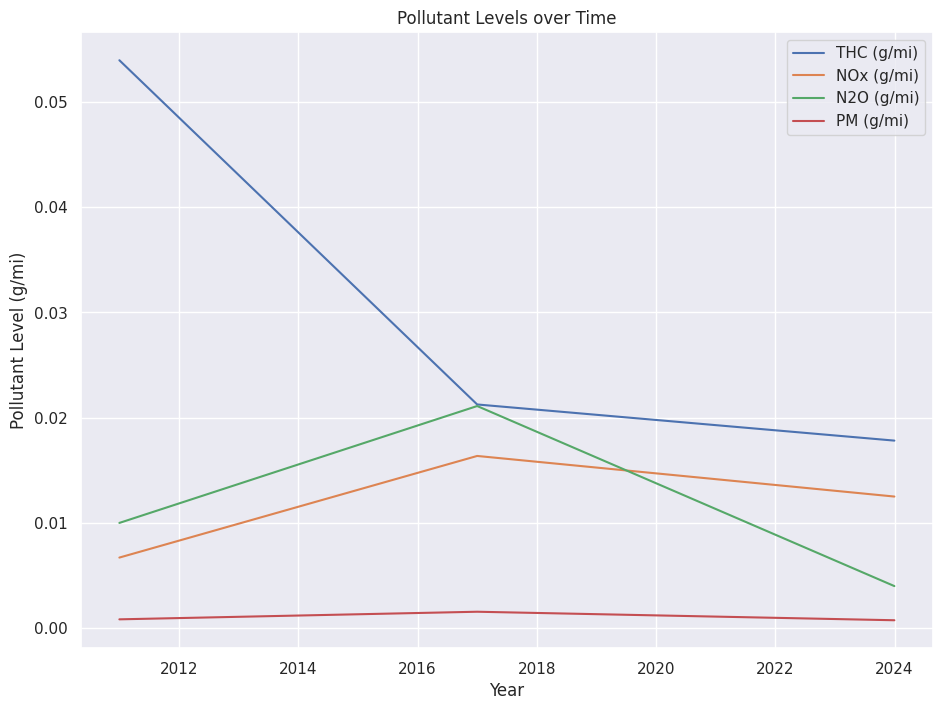

In [64]:
# Plot for THC, NOx, N2O, PM values
plt.plot(df_agg.index, df_agg['THC (g/mi)'])
plt.plot(df_agg.index, df_agg['NOx (g/mi)'])
plt.plot(df_agg.index, df_agg['N2O (g/mi)'])
plt.plot(df_agg.index, df_agg['PM (g/mi)'])


plt.legend(["THC (g/mi)", "NOx (g/mi)", "N2O (g/mi)", "PM (g/mi)"])
plt.xlabel('Year')
plt.ylabel('Pollutant Level (g/mi)')

plt.title('Pollutant Levels over Time')
plt.show()

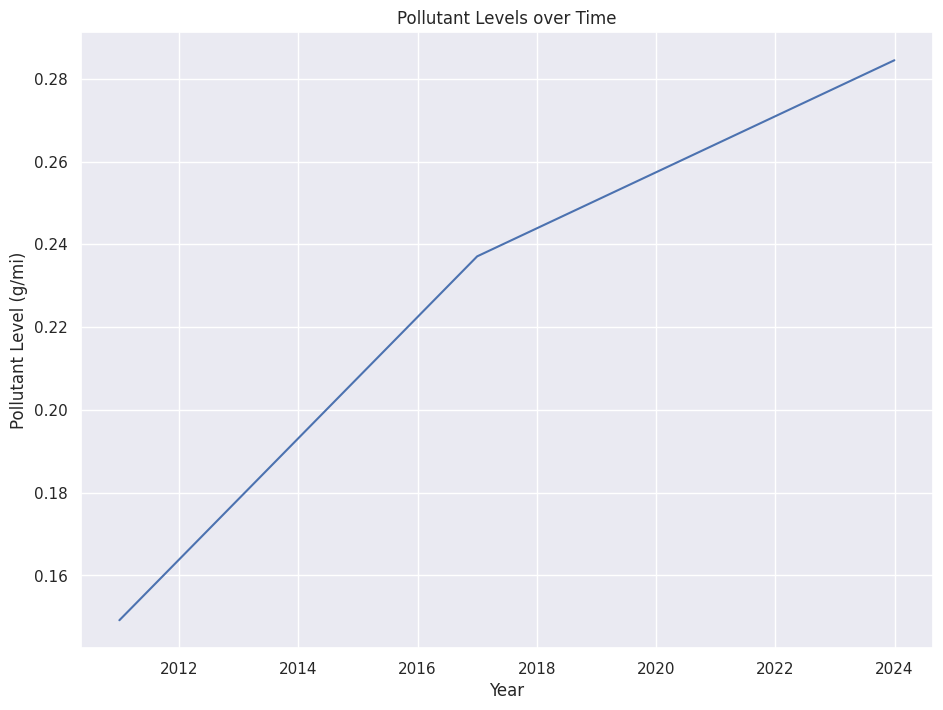

In [81]:
# Plot of CO values
plt.plot(df_agg.index, df_agg['CO (g/mi)'])

plt.xlabel('Year')
plt.ylabel('Pollutant Level (g/mi)')

plt.ylim()
plt.title('Pollutant Levels over Time')
plt.show()

We can notice that the levels of:
1. N2O
2. PM
3. THC
4. NOx
have decreased over the time. The N2O and PM levels were at its peak in the year 2017 and then sharply dropped over the next years.

The CO levels however have not decreased over the years.

Another interesting thing we can notice through these visualizations is that the 2017 is an year of turning points. The levels of N2O, PM, NOx and THC experienced a sharp drop after 2017 and the levels of CO which had seen a steady increase till 2017, experienced a steeper ascent.

Overall, the EPA's claim is tested to be true since 4 out of 5 air pollutants levels we considered have generally decreased over the time

## Finding nearest neighbors

In [66]:
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#### Choosing five numerical features

In [67]:
# Choosing numerical features
features = ["RND_ADJ_FE", "Equivalent Test Weight (lbs.)", "Rated Horsepower",
    "CO (g/mi)", "NOx (g/mi)"]

data_2023 = df[df['Model Year'] == 2023][features]
data_2016 = df[df['Model Year'] == 2016][features]
data_2010 = df[df['Model Year'] == 2010][features]

data_2010.head()

,RND_ADJ_FE,Equivalent Test Weight (lbs.),Rated Horsepower,CO (g/mi),NOx (g/mi)
3377,13.80,4500,470,0.13,0.02
3378,23.70,4500,470,0.02,0.01
3379,16.10,4500,470,0.69,0.04
3380,27.20,4500,470,0.05,0.01
3381,14.40,4500,510,0.39,0.02


In [68]:
# Standardize the numerical features for 2023 data
scaler.fit(data_2023)
data_2023 = pd.DataFrame(scaler.transform(data_2023), columns=features)

# Standardize the numerical features for 2016 data
scaler.fit(data_2016)
data_2016 = pd.DataFrame(scaler.transform(data_2016), columns=features)

# Standardize the numerical features for 2010 data
scaler.fit(data_2010)
data_2010 = pd.DataFrame(scaler.transform(data_2010), columns=features)

data_2010.head()

,RND_ADJ_FE,Equivalent Test Weight (lbs.),Rated Horsepower,CO (g/mi),NOx (g/mi)
0,-1.44,0.26,1.91,-0.55,0.64
1,-0.42,0.26,1.91,-0.81,-0.30
2,-1.20,0.26,1.91,0.82,2.14
3,-0.06,0.26,1.91,-0.72,-0.29
4,-1.38,0.26,2.28,0.10,0.78


#### Choosing 5 vehicles of my liking

In [69]:
# Get vehicles from the years are 2016, 2010, and 2023
d_16 = df[df['Model Year'] == 2016]["Represented Test Veh Model"]
d_10 = df[df['Model Year'] == 2010]["Represented Test Veh Model"]
d_23 = df[df['Model Year'] == 2023]["Represented Test Veh Model"]

# Set of vehicles common to all three years
vehicles = set(d_23) & set(d_16) & set(d_10)
vehicles

{'4RUNNER 2WD',
 '4RUNNER 4WD',
 'A3',
 'A4',
 'A6',
 'C 300',
 'C 300 4MATIC',
 'CAMRY',
 'COROLLA',
 'Cayenne',
 'Cayenne GTS',
 'Cayenne S',
 'E 350',
 'E 350 4MATIC',
 'ES 350',
 'GS 350 AWD',
 'GTI',
 'GX 460',
 'Jetta',
 'MALIBU',
 'MAZDA3',
 'Panamera 4S',
 'Q5',
 'SEQUOIA 2WD',
 'SEQUOIA 4WD',
 'XF'}

In [70]:
# Choosing 5 vehicles
chosen_vehicles = ["A6", "CAMRY", "GTI", "Q5", "4RUNNER 4WD"]

In [71]:
# Find nearest neighbors
def find_neighbors(tree, row_year, year):
    for vehicle in chosen_vehicles:
        
        # Select the row of the vehicle
        row = row_year[row_year['Represented Test Veh Model'] == vehicle][features][:1].values

        # Standardize the row
        row_std = scaler.transform(row)
        
        # Find the nearest neighbors of the row
        dist, ind = tree.query(row_std, k=5)
        
        # Print the results
        print(f"Nearest neighbors of {vehicle} are:")
    
        for i in ind[0][:]:
            print(df[df['Model Year'] == year].iloc[i]['Represented Test Veh Model'], dist[0][1:]) 
        print()

### For the 2023 time period

In [72]:
# Get rows of data where the year is 2023
row_23 = df[df['Model Year'] == 2023]

#### Nearest neighbors using BallTree

In [73]:
tree = BallTree(data_2023, leaf_size=2)
find_neighbors(tree, row_23, 2023)

Nearest neighbors of A6 are:
TRAVERSE AWD [0.34427821 0.40252206 0.4036663  0.41850588]
GV70 [0.34427821 0.40252206 0.4036663  0.41850588]
XC60 T8 AWD Recharge Extended Range [0.34427821 0.40252206 0.4036663  0.41850588]
ACADIA AWD [0.34427821 0.40252206 0.4036663  0.41850588]
Wrangler 4dr 4X4 [0.34427821 0.40252206 0.4036663  0.41850588]

Nearest neighbors of CAMRY are:
M240i xDrive Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
M240i xDrive Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
M240i Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
Q50 AWD RED SPORT [0.5694893  0.57807843 0.59505442 0.62509699]
S5 Coupe [0.5694893  0.57807843 0.59505442 0.62509699]

Nearest neighbors of GTI are:
BLAZER FWD [0.63998278 0.66360564 0.67183996 0.70965046]
XT4 AWD [0.63998278 0.66360564 0.67183996 0.70965046]
Stelvio AWD [0.63998278 0.66360564 0.67183996 0.70965046]
GTI [0.63998278 0.66360564 0.67183996 0.70965046]
ENVISION FWD [0.63998278 0.66360564 0.67183996 0.70965046]

Nearest n

#### Nearest neigbor using KD Tree

In [74]:
tree = KDTree(data_2023, leaf_size=2)
print("Using KD Tree:")
print("----------------------------------------------")

find_neighbors(tree, row_23, 2023)

Using KD Tree:
----------------------------------------------
Nearest neighbors of A6 are:
TRAVERSE AWD [0.34427821 0.40252206 0.4036663  0.41850588]
GV70 [0.34427821 0.40252206 0.4036663  0.41850588]
XC60 T8 AWD Recharge Extended Range [0.34427821 0.40252206 0.4036663  0.41850588]
ACADIA AWD [0.34427821 0.40252206 0.4036663  0.41850588]
Wrangler 4dr 4X4 [0.34427821 0.40252206 0.4036663  0.41850588]

Nearest neighbors of CAMRY are:
M240i xDrive Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
M240i xDrive Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
M240i Coupe [0.5694893  0.57807843 0.59505442 0.62509699]
Q50 AWD RED SPORT [0.5694893  0.57807843 0.59505442 0.62509699]
S5 Coupe [0.5694893  0.57807843 0.59505442 0.62509699]

Nearest neighbors of GTI are:
BLAZER FWD [0.63998278 0.66360564 0.67183996 0.70965046]
XT4 AWD [0.63998278 0.66360564 0.67183996 0.70965046]
Stelvio AWD [0.63998278 0.66360564 0.67183996 0.70965046]
GTI [0.63998278 0.66360564 0.67183996 0.70965046]
ENVISIO

### For the 2016 time period

In [75]:
# Get rows of data where the year is 2016
row_16 = df[df['Model Year'] == 2016]

##### Nearest neighbors using BallTree

In [76]:
tree = BallTree(data_2016, leaf_size=2)

find_neighbors(tree, row_16, 2016)

Nearest neighbors of A6 are:
A6 [0.62495032 0.63814467 0.65729347 0.67869028]
INFINITI QX70 AWD [0.62495032 0.63814467 0.65729347 0.67869028]
INFINITI QX50 AWD Journey [0.62495032 0.63814467 0.65729347 0.67869028]
E 400 4MATIC (coupe) [0.62495032 0.63814467 0.65729347 0.67869028]
740i [0.62495032 0.63814467 0.65729347 0.67869028]

Nearest neighbors of CAMRY are:
MAZDA6 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
Compass FWD [0.54974584 0.55459219 0.56066381 0.57301002]

Nearest neighbors of GTI are:
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]
ACCORD L4 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA3 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]

Nearest neighbors of Q5 are:
XC90 T5 FWD [1.49182903 1.5

##### Nearest neighbors using KDTree

In [77]:
tree = KDTree(data_2016, leaf_size=2)

find_neighbors(tree, row_16, 2016)

Nearest neighbors of A6 are:
A6 [0.62495032 0.63814467 0.65729347 0.67869028]
INFINITI QX70 AWD [0.62495032 0.63814467 0.65729347 0.67869028]
INFINITI QX50 AWD Journey [0.62495032 0.63814467 0.65729347 0.67869028]
E 400 4MATIC (coupe) [0.62495032 0.63814467 0.65729347 0.67869028]
740i [0.62495032 0.63814467 0.65729347 0.67869028]

Nearest neighbors of CAMRY are:
MAZDA6 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
ACCORD L4 [0.54974584 0.55459219 0.56066381 0.57301002]
Compass FWD [0.54974584 0.55459219 0.56066381 0.57301002]

Nearest neighbors of GTI are:
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]
ACCORD L4 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA3 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]
MAZDA6 [0.6879476  0.6973355  0.69822068 0.7024833 ]

Nearest neighbors of Q5 are:
XC90 T5 FWD [1.49182903 1.5

#### For the 2010 time period 

In [78]:
# Get rows of data where the year is 2010
row_10 = df[df['Model Year'] == 2010]

##### Nearest neighbors using BallTree

In [79]:
tree = BallTree(data_2010, leaf_size=2)

find_neighbors(tree, row_10, 2010)

Nearest neighbors of A6 are:
A6 [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]
A5 quattro [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]

Nearest neighbors of CAMRY are:
CAMRY [0.27620762 0.35694582 0.40021704 0.40106665]
ES 350 [0.27620762 0.35694582 0.40021704 0.40106665]
C 350 [0.27620762 0.35694582 0.40021704 0.40106665]
C 350 [0.27620762 0.35694582 0.40021704 0.40106665]
1EF37 [0.27620762 0.35694582 0.40021704 0.40106665]

Nearest neighbors of GTI are:
GTI [0.4811789  0.54209322 0.54604923 0.63495461]
GTI [0.4811789  0.54209322 0.54604923 0.63495461]
FUSION [0.4811789  0.54209322 0.54604923 0.63495461]
S40 2.4i  FWD [0.4811789  0.54209322 0.54604923 0.63495461]
GTI [0.4811789  0.54209322 0.54604923 0.63495461]

Nearest neighbors of Q5 are:
Q5 [0.32878469 0.37885459 0.39650016 0.40264519]
E 550 (coupe) [0.32878469 0.37885459 0.396

##### Nearest neighbors using KDTree

In [80]:
tree = KDTree(data_2010, leaf_size=2)

find_neighbors(tree, row_10, 2010)

Nearest neighbors of A6 are:
A6 [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]
A5 quattro [0.31545473 0.41366781 0.5510446  0.57424399]
6DM69 [0.31545473 0.41366781 0.5510446  0.57424399]

Nearest neighbors of CAMRY are:
CAMRY [0.27620762 0.35694582 0.40021704 0.40106665]
ES 350 [0.27620762 0.35694582 0.40021704 0.40106665]
C 350 [0.27620762 0.35694582 0.40021704 0.40106665]
C 350 [0.27620762 0.35694582 0.40021704 0.40106665]
1EF37 [0.27620762 0.35694582 0.40021704 0.40106665]

Nearest neighbors of GTI are:
GTI [0.4811789  0.54209322 0.54604923 0.63495461]
GTI [0.4811789  0.54209322 0.54604923 0.63495461]
FUSION [0.4811789  0.54209322 0.54604923 0.63495461]
S40 2.4i  FWD [0.4811789  0.54209322 0.54604923 0.63495461]
GTI [0.4811789  0.54209322 0.54604923 0.63495461]

Nearest neighbors of Q5 are:
Q5 [0.32878469 0.37885459 0.39650016 0.40264519]
E 550 (coupe) [0.32878469 0.37885459 0.396

#### Do the nearest neighbors meet intuitive expectations?

One of the important things to consider for this analysis are the features we have chosen. The chosen features plays an important role in determination of the nearest neighbors. 

For instance, let us consider car 'Q5'. The nearest neighbor of Q5 over the 3 time periods are 'PATHFINDER 4WD S' , 'XC90 T5 FWD', 'E 550 (coupe)'.

Now, just intutively, let us try to determine if these cars are similar or not. 
1. Q5 and PATHFINDER 4WD S are SUVs while the XC90 TF FWD and E 550 Coupe are not.
2. They also differ in size. XC90 T5 FWD is larger than the Q5 in terms of overall size and seating capacity. The E 550 Coupe is smaller than the Q5, with only two doors.
3. Q5 is an all-wheel drive vehicle while PATHFINDER 4WD S, XC90 TF FWD,E 550 Coupe are all a 2-wheel drive vehicles.

So, by intuition I would say PATHFINDER 4WD S is similar to Q5, and XC90 TF FWD and E 550 (coupe) are not.

But the features we have considered for the determination of nearest neighbors are different. So the results are justified.

#### Did the nearest neighbors change for any of the cars? 

The nearest neighbors changed for all the five considered cars. I think some of the reasons is that:
1. The dataset used for the three time periods are different, so the neighbors may also change.
2. There may be changes in the values of the some of the considered features. For instance, newer car models may have better mileage or emit lesser number of pollutants compared to previous years models.

Since the values of the features change, the nearest neighbors may also change for the time periods